In [1]:
# For Reproducable results
from numpy.random import seed
seed(1)

# Asthetics
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# General
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
from tqdm import tqdm

# Visialisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc




In [2]:
data_path = 'D:/PhD ITSMD/ML AND AI/Dataset'

train_file_path = os.path.join(data_path, 'Country-data.csv')

print(f'Training file path: {train_file_path}')

Training file path: D:/PhD ITSMD/ML AND AI/Dataset\Country-data.csv


In [3]:
train_df = pd.read_csv(train_file_path)
train_df.sample(10) # Random 10 rows from the data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
44,Denmark,4.1,50.5,11.40,43.6,44000,3.22,79.5,1.87,58000
47,Egypt,29.1,21.3,4.66,26.6,9860,10.10,70.5,3.19,2600
143,Suriname,24.1,52.5,7.01,38.4,14200,7.20,70.3,2.52,8300
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
78,Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3680
35,Colombia,18.6,15.9,7.59,17.8,10900,3.86,76.4,2.01,6250
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030


In [4]:
# Basic Decriptive Analysis
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [5]:
train_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
train_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
features = [
    'child_mort', 'exports', 'health','imports',
    'income', 'inflation', 'life_expec', 'total_fer',
    'gdpp'
]

In [8]:
# Features of smilar scales grouped together for better visibility
features_1 = [
    'income', 'gdpp'
]

features_2 = [
    'child_mort', 'exports','imports',
    'inflation', 'life_expec'
]

features_3 = [
    'health','total_fer'
]

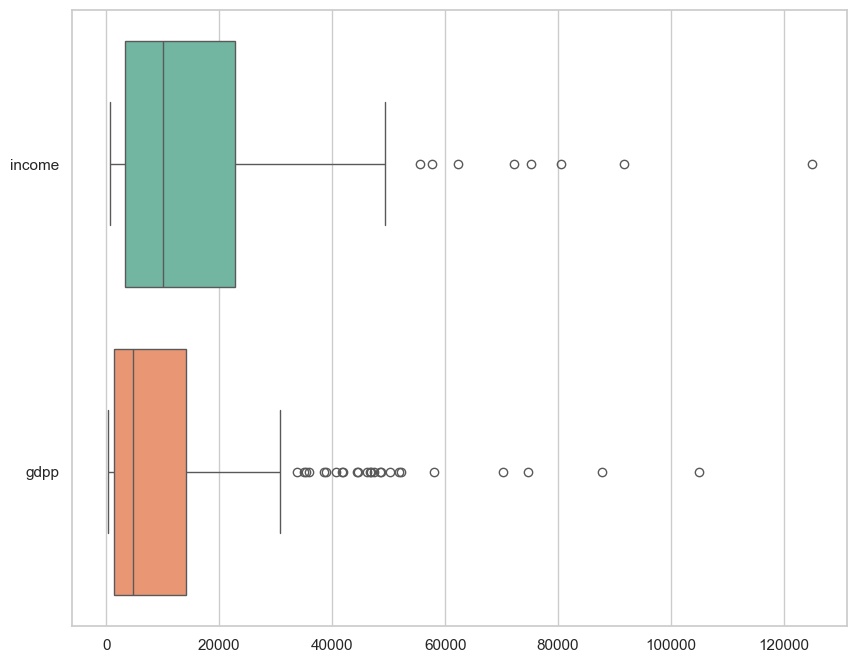

In [9]:
#EDA Inferences:-Explotory Data analysis
plt.figure(figsize=(10,8))
sns.boxplot(data=train_df[features_1], orient="h", palette="Set2");
plt.show()

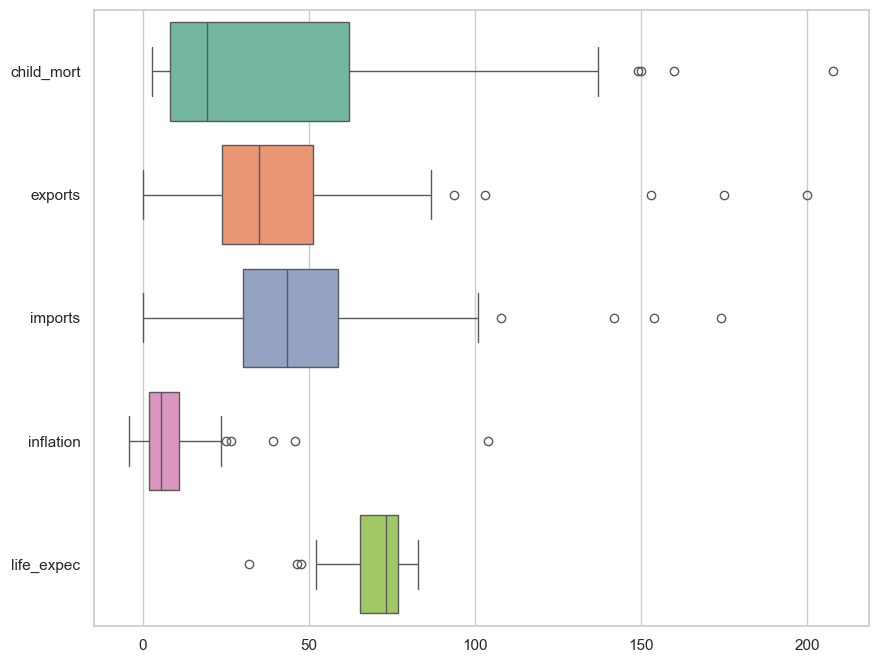

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train_df[features_2], orient="h", palette="Set2");
plt.show()

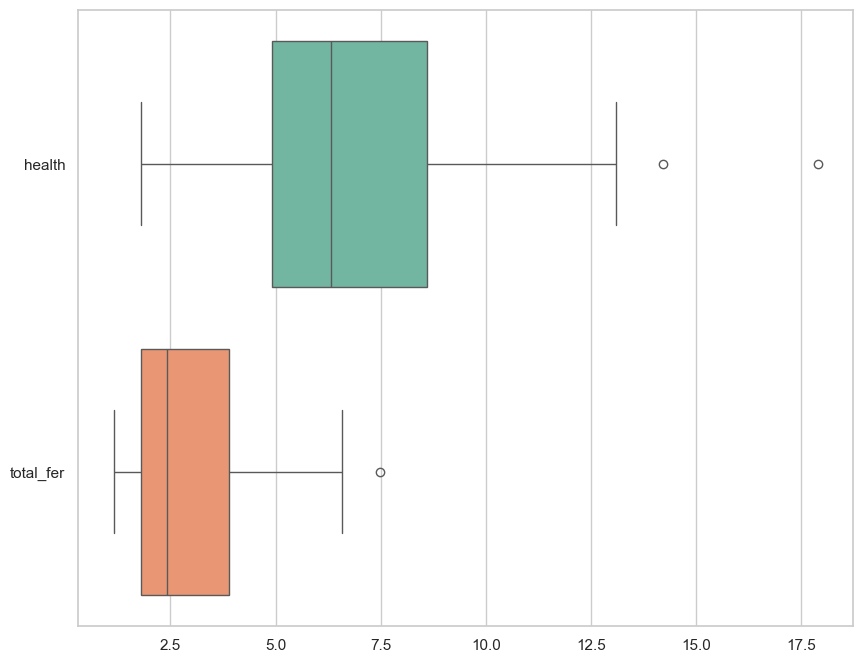

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train_df[features_3], orient="h", palette="Set2");
plt.show()

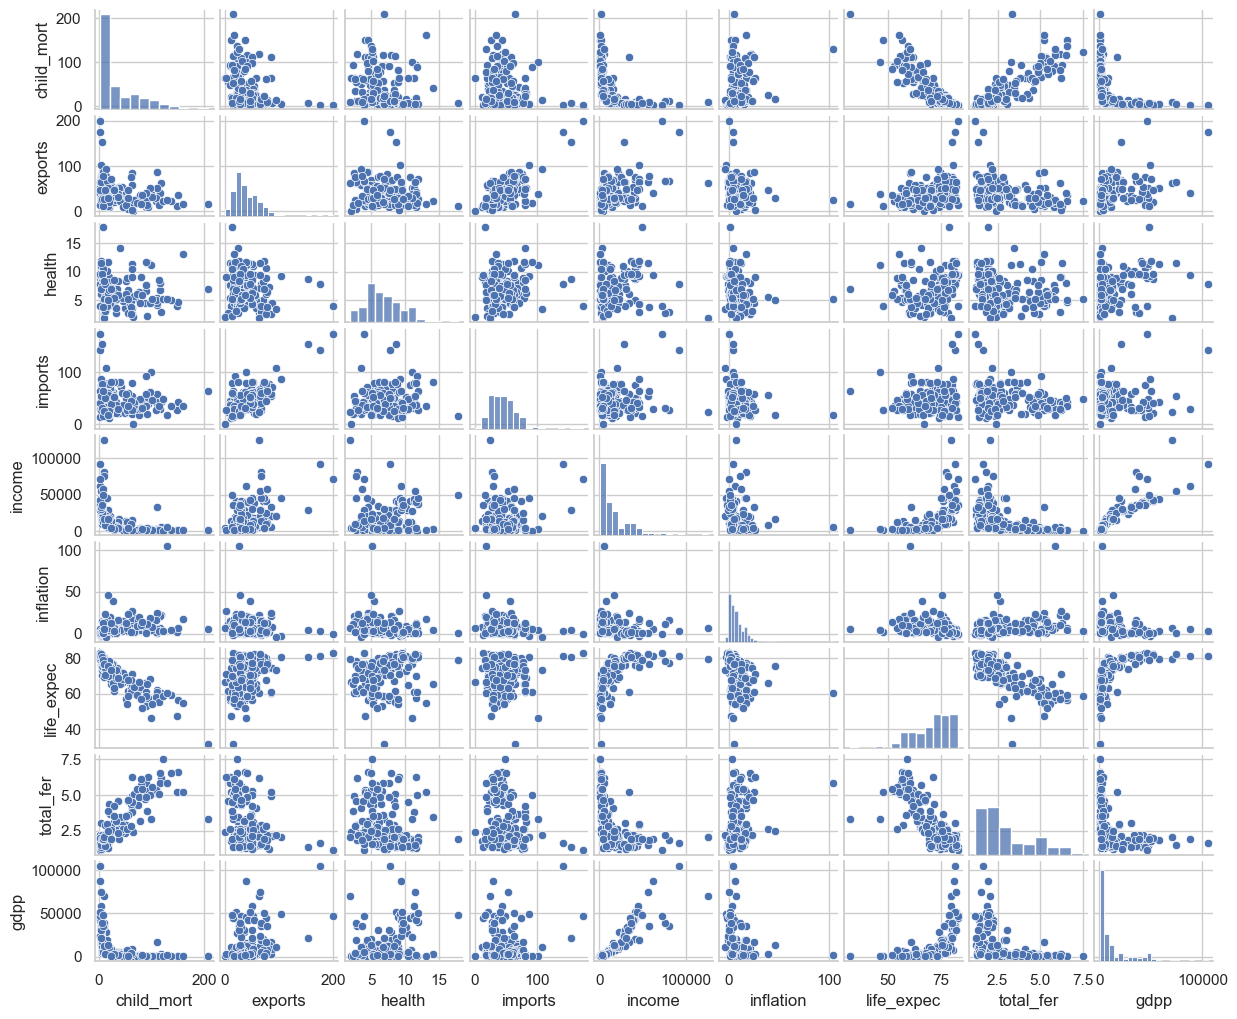

In [12]:
#Pair-Wise Analysis
g = sns.pairplot(train_df[features])
g.fig.set_size_inches(12,10)
plt.show()

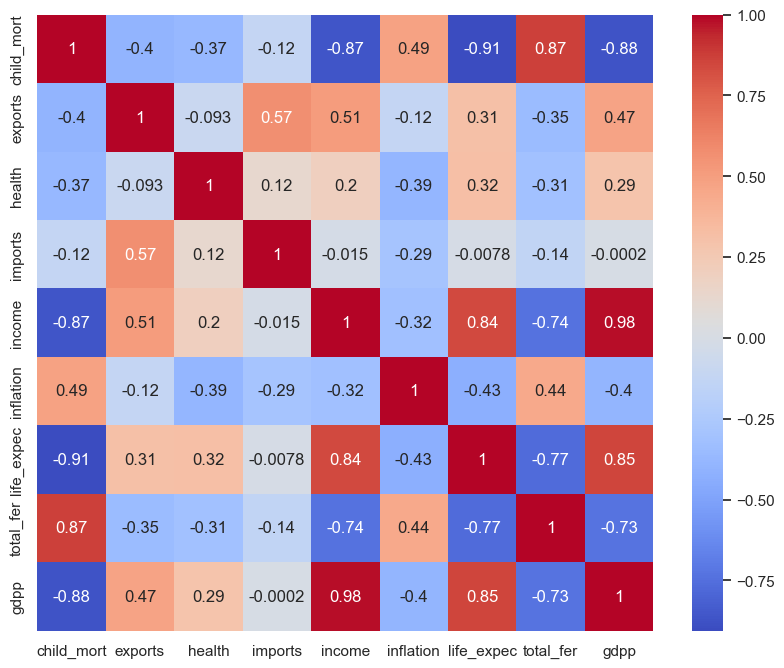

In [13]:
train_df_cor_spear = train_df[features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(train_df_cor_spear, square=True, cmap='coolwarm', annot=True);
plt.show()

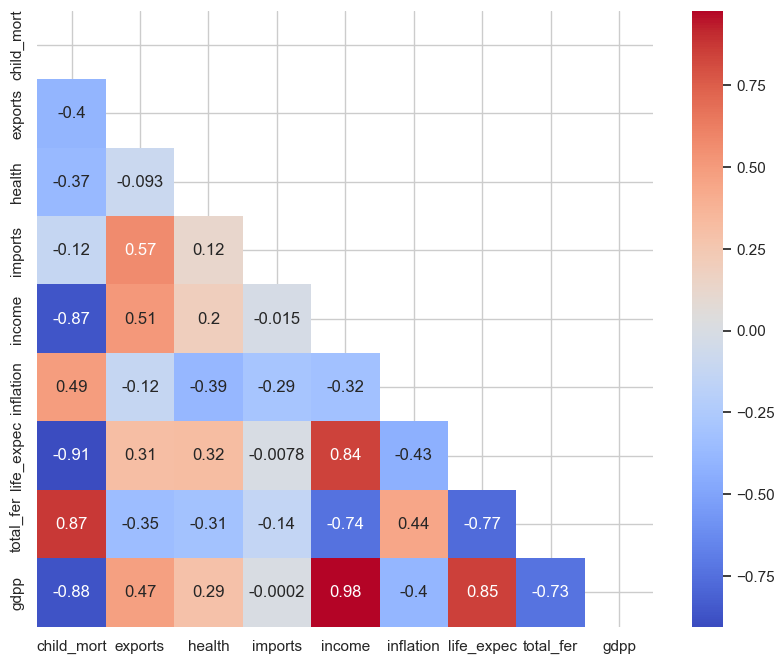

In [14]:
train_df_cor_spear = train_df[features].corr(method='spearman')
mask = np.zeros_like(train_df_cor_spear)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(train_df_cor_spear, mask=mask, square=True, cmap='coolwarm', annot=True);
plt.show()

In [15]:
#Feature Engineering
features_to_drop = ['gdpp', 'child_mort', 'total_fer']
train_df.drop(features_to_drop, axis=1, inplace=True)

In [16]:
train_df['Trade_Deficiency'] = train_df['exports'] - train_df['imports']

In [17]:
features = [feat for feat in train_df.columns if feat not in ['country']]
print(features)

['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'Trade_Deficiency']


In [18]:
#Scaler data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)

In [19]:
#utilis
def project_to_2d(df, features=features, plot=False, cluster=None):
    pca = PCA(n_components=2)
    projected = pca.fit_transform(df[features])
    if plot:
        if cluster is None:
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1]
            )
        elif cluster is not None:
            num_clusters = df[cluster].nunique()
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1],
                hue=df[cluster].values,
                palette=sns.color_palette("husl", num_clusters)
            )
    return projected

In [20]:
def pair_plot_cluster(df, scaled_data, cluster, features=features):
    df[cluster] = scaled_data[cluster]
    num_clusters = df[cluster].nunique()
    g = sns.pairplot(
        df[features + [cluster]],
        hue=cluster,
        palette=sns.color_palette("husl", num_clusters)
    )
    g.fig.set_size_inches(12,10)
    plt.show()

In [21]:
RANDOM_SEED = 42

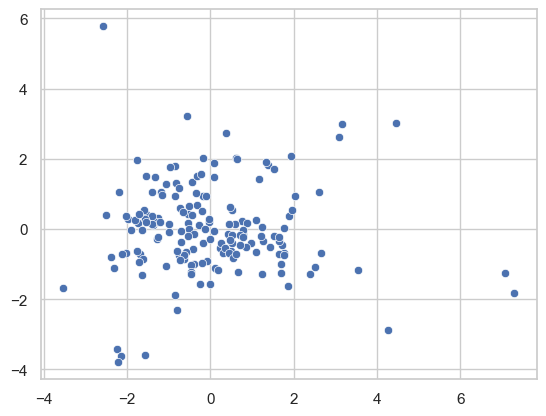

In [22]:
projected_df = project_to_2d(scaled_data, features, plot=True)
plt.show()

In [23]:
#Model creation 
model = KMeans(n_clusters=2, init='k-means++', random_state=RANDOM_SEED)
# 2 is just an arbitrary number, we will find the exact number soon below

model.fit(scaled_data[features])
scaled_data['KMeans'] = model.predict(scaled_data[features])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



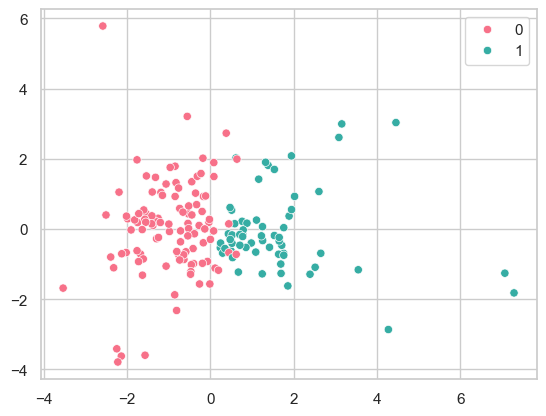

In [24]:
projected_df = project_to_2d(scaled_data, features, plot=True, cluster='KMeans')
plt.show()

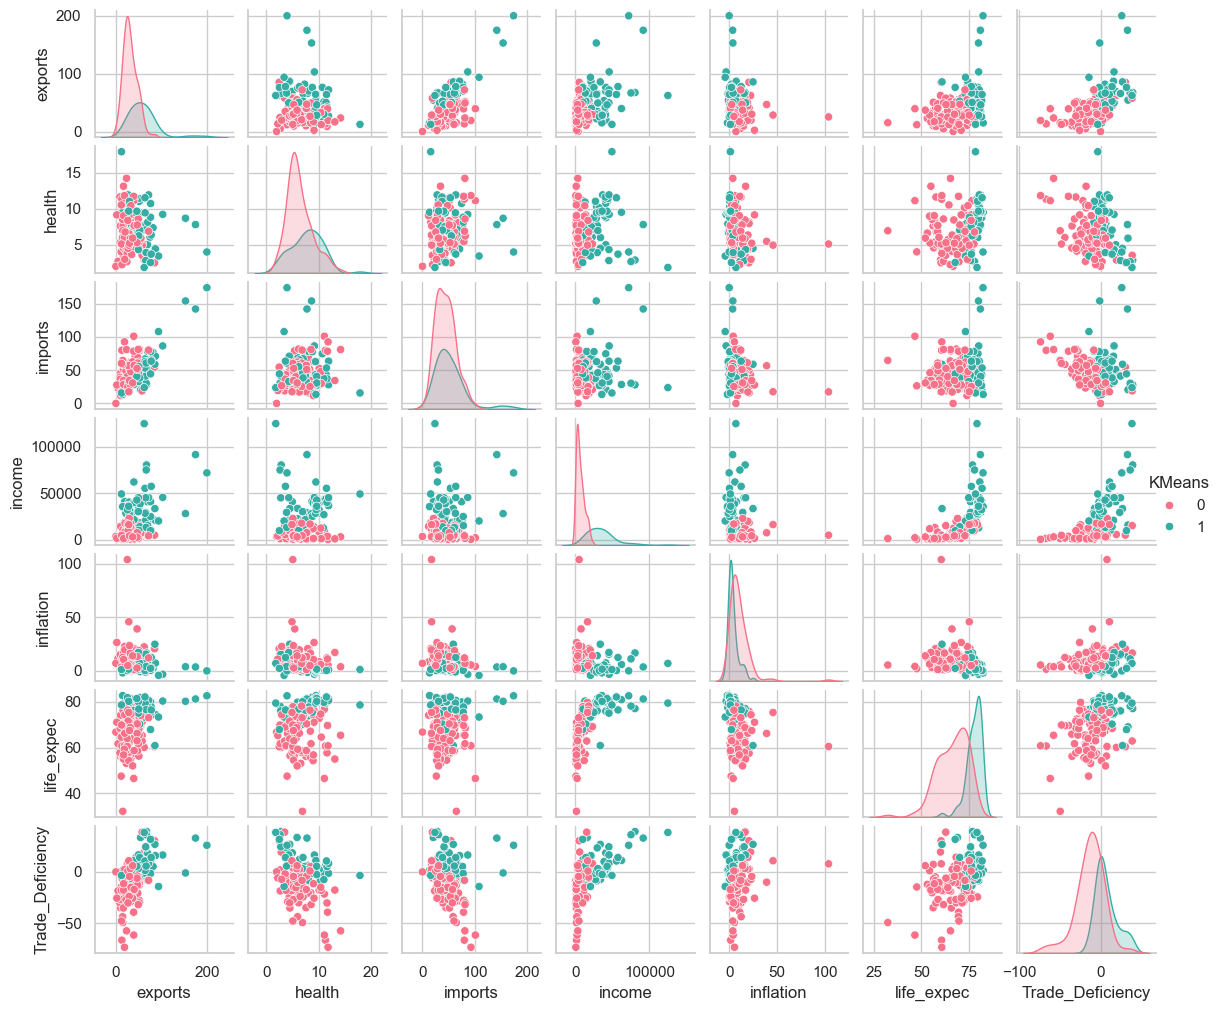

In [26]:
pair_plot_cluster(train_df, scaled_data, 'KMeans')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

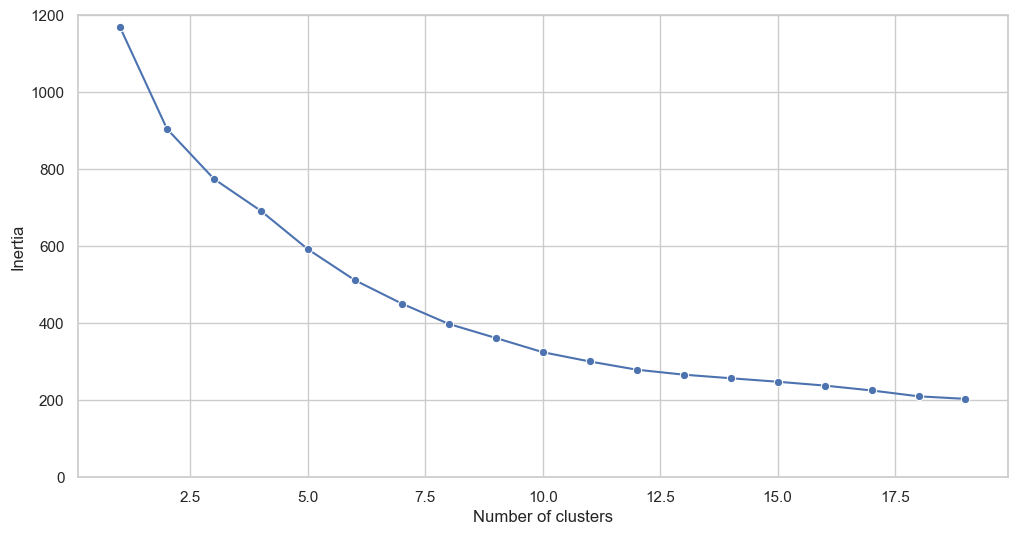

In [32]:
#Elbow Method
INERTIAS = []
for cluster in range(1,20):
    model = KMeans(n_clusters = cluster, init='k-means++',
                   random_state=RANDOM_SEED)
    model.fit(scaled_data[features])
    INERTIAS.append(model.inertia_)

inert_df = pd.DataFrame({'Num_Clusters':range(1,20), 'Inertia':INERTIAS})
plt.figure(figsize=(12,6))
sns.lineplot(data=inert_df, x="Num_Clusters", y="Inertia", marker='o')
plt.ylim(0, 1200)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.show()

In [33]:
model = KMeans(n_clusters=3, init='k-means++', random_state=RANDOM_SEED)
model.fit(scaled_data[features])
scaled_data['KMeans'] = model.predict(scaled_data[features])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



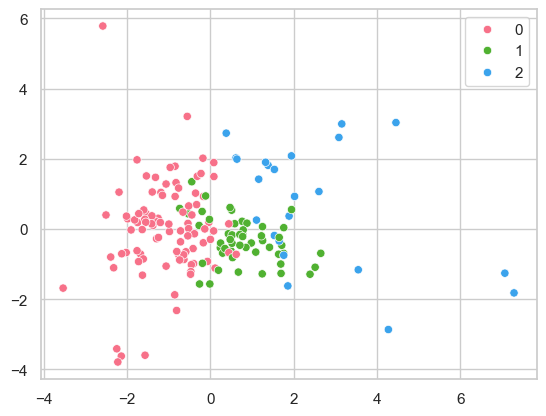

In [34]:
projected_df = project_to_2d(scaled_data, features, plot=True, cluster='KMeans')
plt.show()

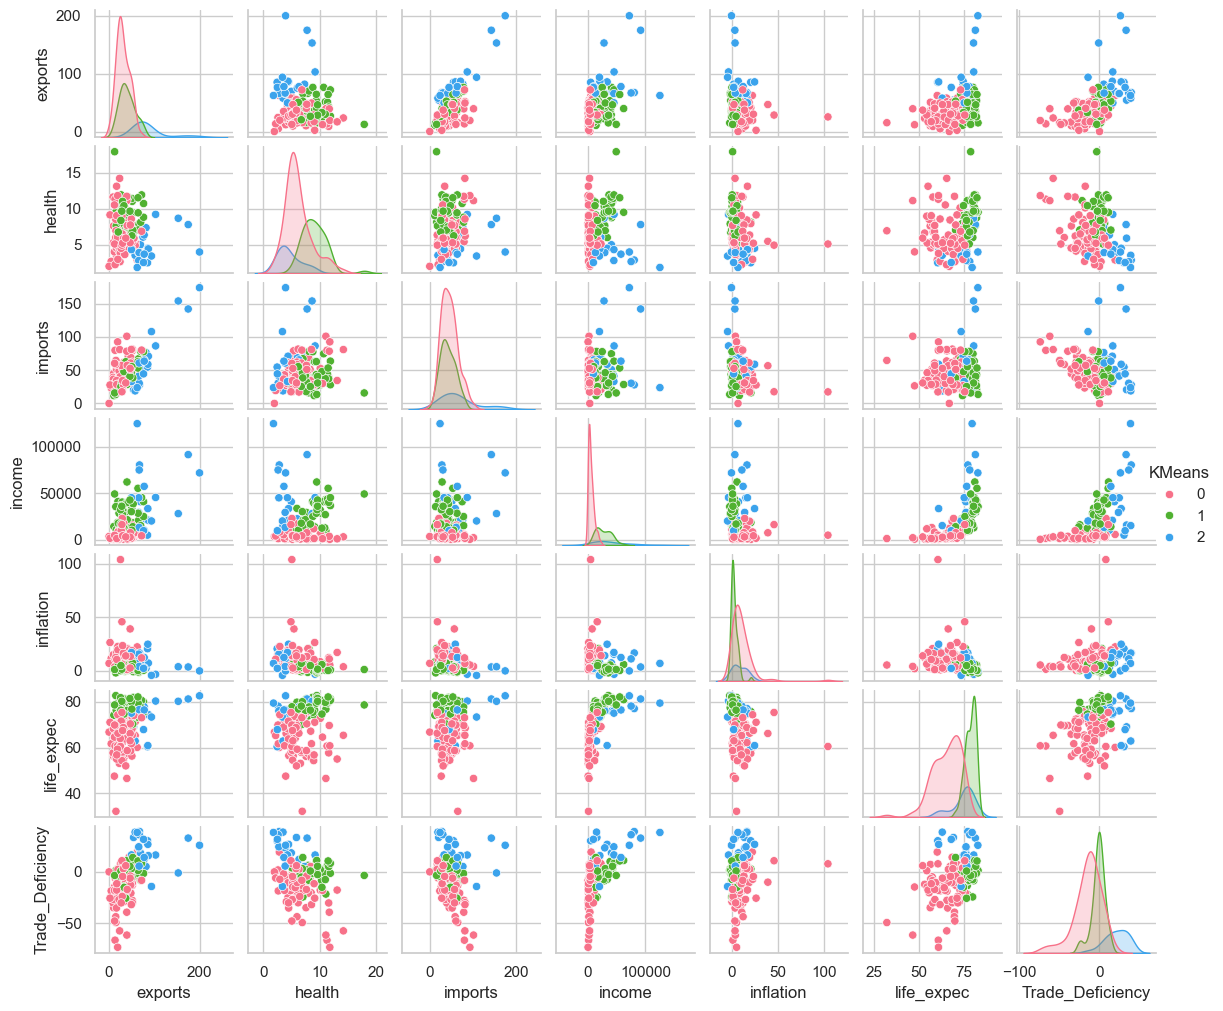

In [35]:
pair_plot_cluster(train_df, scaled_data, 'KMeans')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

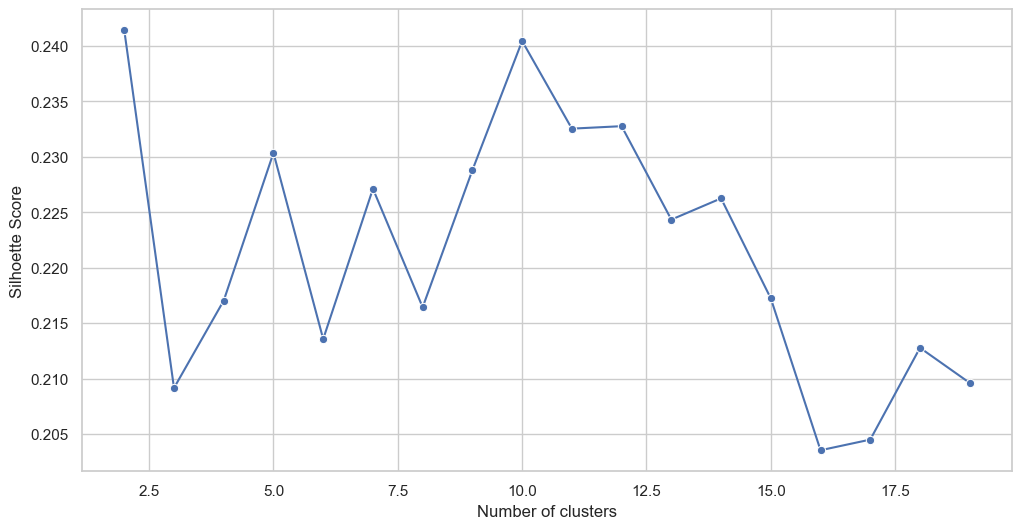

In [38]:
SILHOUETTES = []
for cluster in range(2,20):
    model = KMeans(
        n_clusters = cluster, init='k-means++',
        random_state=RANDOM_SEED)
    model.fit(scaled_data[features])
    labels = model.labels_
    SILHOUETTES.append(silhouette_score(
        scaled_data[features],
        labels, metric = 'euclidean'
    ))

inert_df = pd.DataFrame({'Num_Clusters':range(2,20), 'Silhoette':SILHOUETTES})
plt.figure(figsize=(12,6))
sns.lineplot(data=inert_df, x="Num_Clusters", y="Silhoette", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoette Score');
plt.show()

In [39]:
model = KMeans(n_clusters=2, init='k-means++', random_state=RANDOM_SEED)
model.fit(scaled_data[features])
scaled_data['KMeans'] = model.predict(scaled_data[features])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



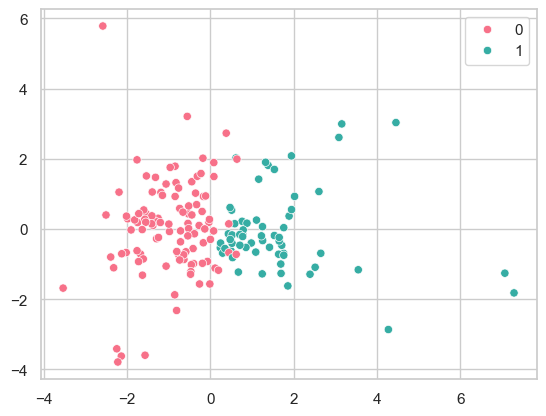

In [40]:
projected_df = project_to_2d(scaled_data, features, plot=True, cluster='KMeans')
plt.show()

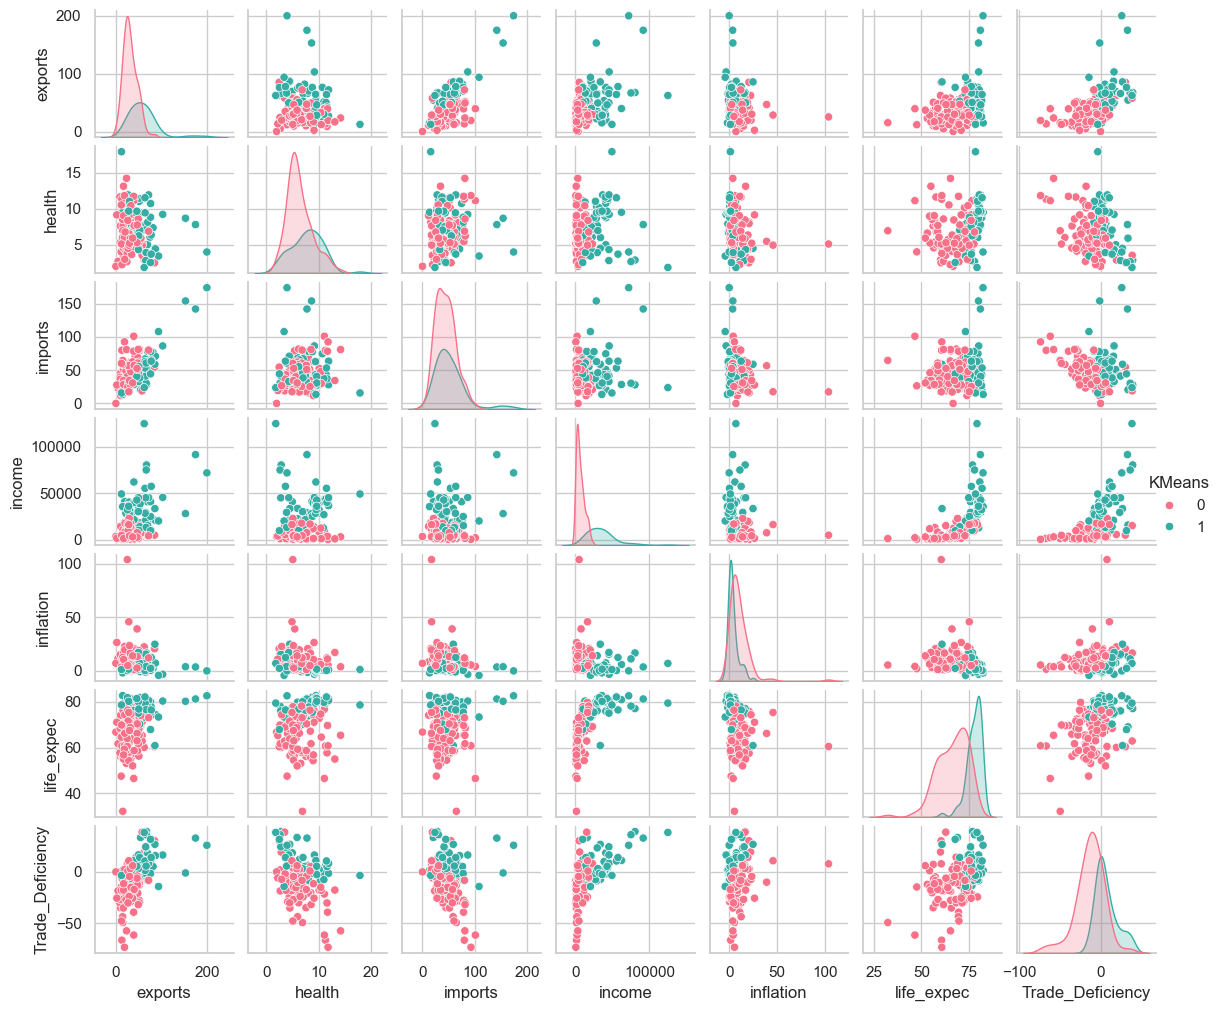

In [41]:
pair_plot_cluster(train_df, scaled_data, 'KMeans')
plt.show()

In [45]:
#prediction 
label_dict = {
    0 : 'Unhealthy Lifestyle',
    1 : 'Healthy Lifestyle'
}

train_df['Kmeans_Prediction'] = train_df['KMeans'].map(label_dict)

In [46]:
print(train_df[train_df['Kmeans_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list())

['Israel', 'Spain', 'United Arab Emirates', 'Lithuania', 'South Korea', 'Maldives', 'Costa Rica', 'New Zealand', 'Thailand', 'Equatorial Guinea']


In [47]:
print(train_df[train_df['Kmeans_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list())

['Philippines', 'Guinea', 'Namibia', 'Myanmar', 'Serbia', 'Venezuela', 'Ghana', 'Pakistan', 'Tajikistan', 'Paraguay']


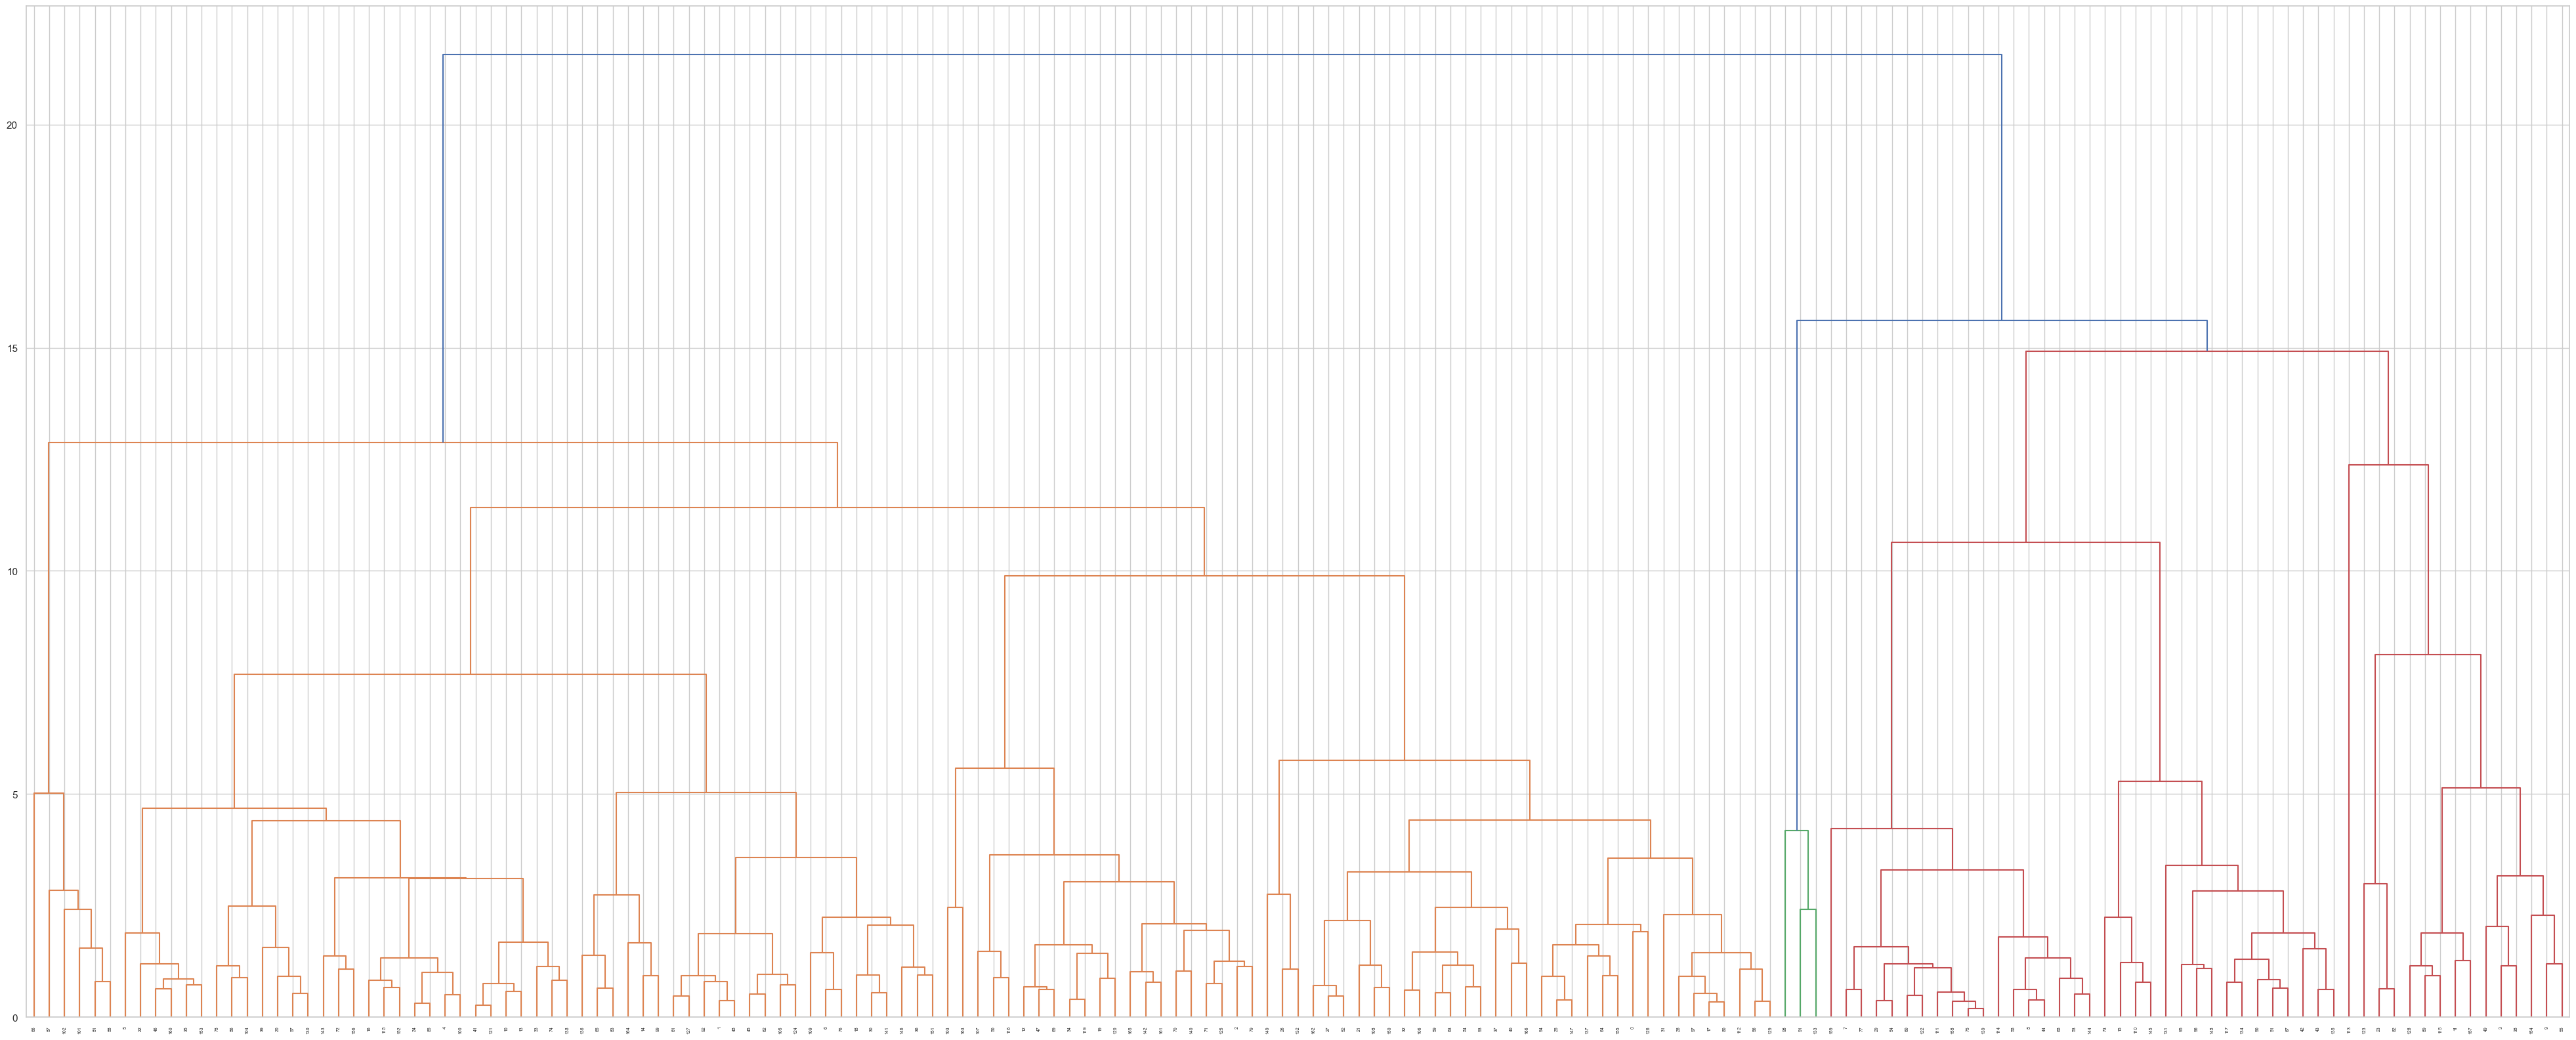

In [50]:
#Hierarchical Clustering
plt.figure(figsize=(50, 20))
_ = shc.dendrogram(shc.linkage(scaled_data[features], method='ward'))
plt.show()

In [53]:
#Agglomerative Hierarchical Clustering
#Bottom up approach.
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model.fit(scaled_data[features])
scaled_data['Agglomerative_H'] = model.labels_

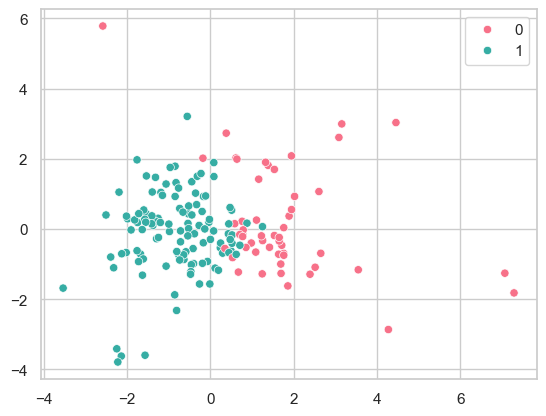

In [54]:
projected_df = project_to_2d(scaled_data, features, plot=True, cluster='Agglomerative_H')
plt.show()

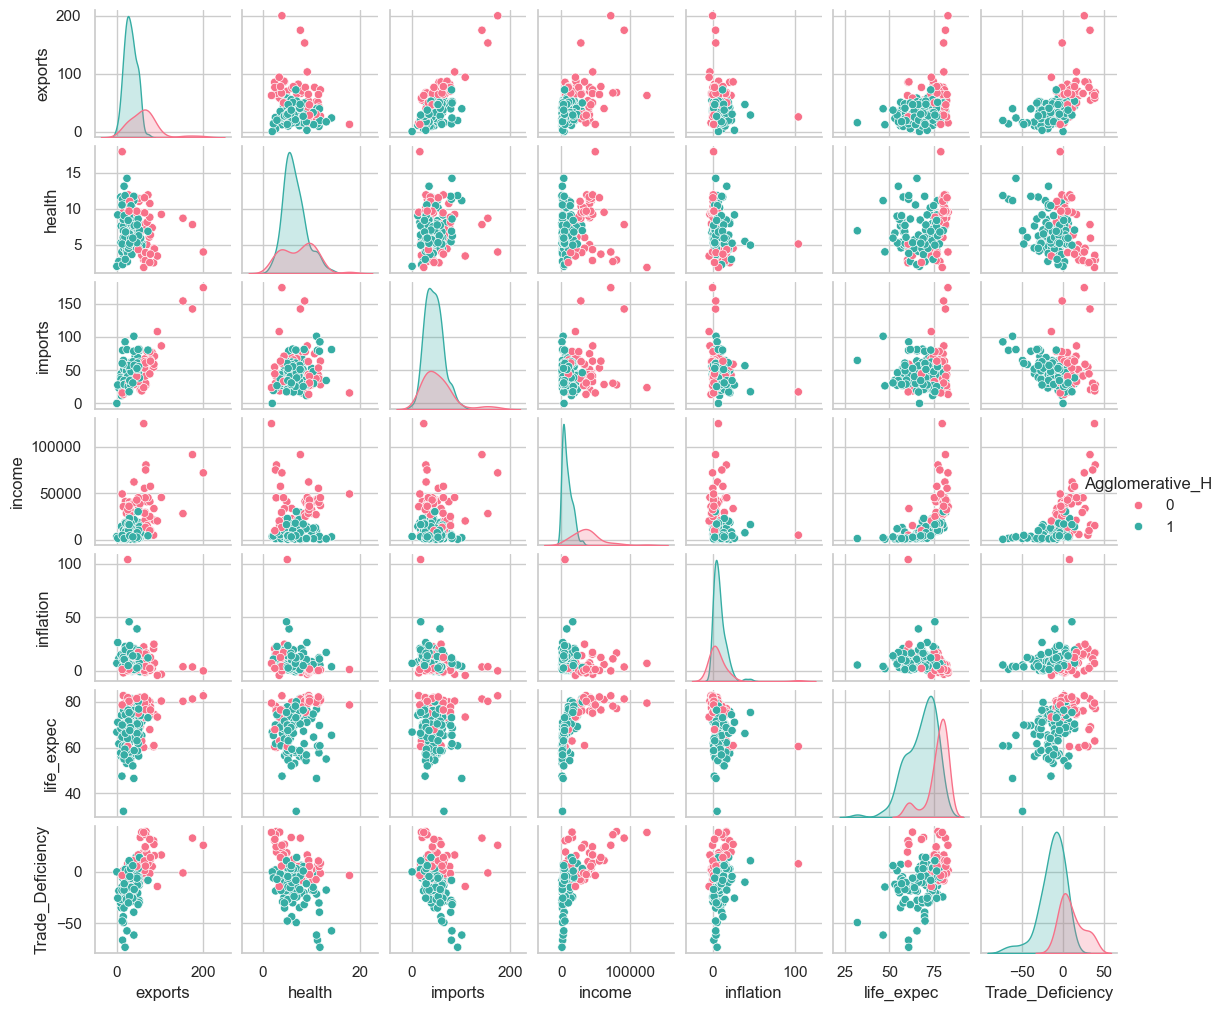

In [55]:
pair_plot_cluster(train_df, scaled_data, 'Agglomerative_H')
plt.show()

In [56]:
#predictions 
label_dict = {
    0 : 'Healthy Lifestyle',
    1 : 'Unhealthy Lifestyle'
}

train_df['Agglomerative_Prediction'] = train_df['Agglomerative_H'].map(label_dict)

In [57]:
print(train_df[train_df['Agglomerative_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list())

['Canada', 'New Zealand', 'Ireland', 'Malta', 'Finland', 'Slovak Republic', 'Australia', 'France', 'Spain', 'Sweden']


In [58]:
print(train_df[train_df['Agglomerative_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list())

['Guinea-Bissau', 'Guatemala', 'Morocco', 'Sierra Leone', 'Jamaica', 'Belarus', 'Montenegro', 'Guinea', 'Albania', 'South Korea']
